<a href="https://colab.research.google.com/github/EstebanExplorer/Ejercicio-Notas-Academicas/blob/lab5/Copia_de_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Listas generalizadas

## Objetivos del Taller

Entender el concepto de lista generalizada, sus posibles representaciones, su manipulación y su uso


## Grupo
Este taller es para desarrollar en parejas


## Fecha de entrega
Nov 4 por udearroba.

## Preguntas básicas del taller

- ¿Qué es una lista generalizada?  Resuelta
- ¿Cómo se define y se implementa?  Resuelta

EJERCICIOS

- ¿Qué consecuencias tienen las decisiones de implementación sobre complejidad en las operaciones de la lista?
-  Implemente una solución qe permita reprentar en una lista generalizada la edad de los miembros de 3 cursos de un colegio.
    -  Halle la edad promedio de todo el grupo de personas
    -  Halle la edad promedio de cada curso.
    -  Informe en que curso se encuentra la persona con menor edad
-   Implementa el método __getitem__ para que funcione con índices positivos y negativos. Por ejemplo:
    
    


## Introducción

Una lista generalizada es un conjunto finito de $n$  elementos ($n\ge 0$) cada uno de los cuales es un átomo u otra lista generalizada. La lista generalizada es una estructura recursiva por definición ya que se define en términos de si mismo. Por ejemplo:

		W = (a, (b, c), d, (e, (f, g)), h)      

Los átomos se presentan separados por comas, y cuando un elemento sea otra lista, ésta irá entre paréntesis.

Una lista generalizada se puede representar como una lista ligada. La configuración de cada nodo usa 3 campos:

- Marca: `0` si el nodo es un átomo o `1` si es una sublista
- Dato: el átomo o una referencia a una sublista.
- Siguiente: Referencia al siguiente nodo o `None` si no hay más nodos.

Por ejemplo, la lista anterior se representaría de la siguiente manera.

In [ ]:
from IPython.display import Image
Image(filename='local/imgs/lista_generalizada.jpg', width=700)


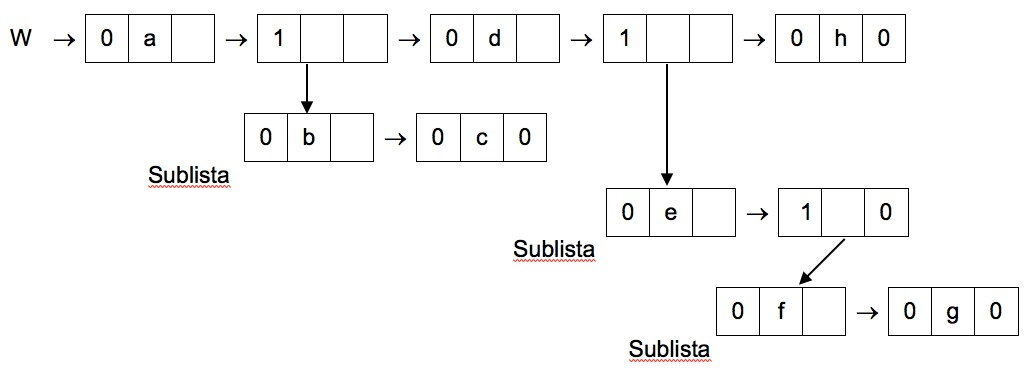

Esta lista se representaría en Python de la siguiente manera

In [ ]:
a,b,c,d,e,f,g,h = list(range(8))
W = [a, [b,c], d, [e, [f,g]], h]
print(W)
print(len(W))
print(W[3], ":", W[3][0], ":", W[3][1][0])

Realicemos nosotros nuestra propia implementación. Para ello definimos una clase para representar cualquier nodo. Observa que no usamos un campo explícito para diferenciar si tenemos un átomo o una nueva lista. Esto lo resolveremos llamando a type.



In [ ]:
class Node:
    def __init__(self, value, next=None):
        assert next is None or isinstance(next,Node), "next must be Node, not %s"%(type(next))
        self.value = value
        self.next  = next

    def __repr__(self):
        return str(self.value)

In [ ]:
n = Node(10, Node(20, Node(30)))

k=n
print(k, end=' ')
while (k.next is not None):
    print("--> %s"%k.next, end=' ')
    k = k.next

Y definimos una clase para una lista generalizada. Fíjate que no usamos ninguna list de python ya que precisamente es lo que estamos implementando.

In [ ]:
class L(object):
    def __init__ (self, first_node=None):
        assert first_node is None or isinstance(first_node,Node), "first must be Node, not %s"%(type(first_node))
        self.first_node = first_node

    def __getitem__(self, idx):
        k = self.first_node
        for i in range(idx):
            assert k.next is not None, "index %s out of range"%(str(idx))
            k = k.next
        return k.value

    def __len__(self):
        k = self.first_node
        if k is None:
            return 0
        i=1
        while k.next is not None:
            i+=1
            k = k.next
        return i

    def __repr__ (self):
        if self.first_node is None:
            return "[]"

        s = "[ %s"%self.first_node
        k=self.first_node
        while (k.next is not None):
            s += ", %s"%k.next
            k = k.next

        return s+" ]"

Fíjate cómo creamos una lista sólo con átomos

In [ ]:
W = L(Node(10, Node(20, Node(30))))
print(W)
print("len =", len(W))

Y una lista con sublistas

In [ ]:
W=L(Node(10, Node(L(Node(14, Node(18))), Node(20, Node(30)))))
print(W)
print("len =", len(W))

En este caso una sublista va encapsulada dentro de un nodo

In [ ]:
print(Node(L(Node(14, Node(18)))))
print(W[1])
print("len sublista =", len(W[1]))

Observa la implementación del método getitem y cómo de manera natural soporta el indexado de sublistas

In [ ]:
W=L(Node(10, Node(L(Node(14, Node(18))), Node(20, Node(30)))))
print("the list:          ", W)
print("element at 1:      ", W[1])
print("element at 2:      ", W[2])
print("element of sublist:", W[1][0])

Por supuesto, también soportamos la lista vacía

In [ ]:
W = L()
print(W)
print("len = ", len(W))

Añadimos un método suma que me concatene dos listas generalizadas

In [ ]:
class L(L):

    def __add__(self, M):
        # obtiene el ultimo elemento de esta lista
        k = self.first_node

        # si la lista actual no tiene elementos
        if k is None:
            self.first_node = M.first_node
            return self

        # en caso contrario la agregamos al ultimo nodo
        while k.next is not None:
            k = k.next

        k.next = M.first_node
        return self

In [ ]:
W = L(Node(10, Node(20, Node(30))))
Z = L(Node(3, Node(2)))
print(W)
print(Z)
print(W + Z + L())

## Ejercicio 1

Implemente una solución qe permita reprentar en una lista generalizada la edad de los miembros de 3 cursos de un colegio.
    -  Halle la edad promedio de todo el grupo de personas
    -  Halle la edad promedio de cada curso.
    -  Informe en que curso se encuentra la persona con menor edad


## Ejercicio 2

En estos ejercicios usaremos las clases Node y L. Ejecuta la siguiente celda para cargar sus definiciones.

In [ ]:
class Node:
    def __init__(self, value, next=None):
        assert next is None or isinstance(next,Node), "next must be Node, not %s"%(type(next))
        self.value = value
        self.next  = next

    def __repr__(self):
        return str(self.value)

class L(object):
    def __init__ (self, first_node=None):
        assert first_node is None or isinstance(first_node,Node), "first must be Node, not %s"%(type(first_node))
        self.first_node = first_node

    def __getitem__(self, idx):
        k = self.first_node
        for i in range(idx):
            assert k.next is not None, "index %s out of range"%(str(idx))
            k = k.next
        return k.value

    def __len__(self):
        k = self.first_node
        if k is None:
            return 0
        i=1
        while k.next is not None:
            i+=1
            k = k.next
        return i

    def __repr__ (self):
        if self.first_node is None:
            return "[]"

        s = "[ %s"%self.first_node
        k=self.first_node
        while (k.next is not None):
            s += ", %s"%k.next
            k = k.next

        return s+" ]"



In [ ]:
Ejercicio 2. Implementa el método __getitem__ para que funcione con índices positivos y negativos. Por ejemplo:

In [ ]:
> W = L1(Node(10, Node(20, Node(30))))
> print W
[ 10, 20, 30 ]

> print W[0], W[1], W[2]
> print W[-1], W[-2], W[-3]
10 20 30
30 20 10

Ten en cuenta los casos en los que el índice excede el tamaño de la lista, bien positivo bien negativo. En estos casos has de generar un assertion error.

En el ejemplo anterior, W[3] y W[-4] deben de generar un AssertionError


In [ ]:
class Node:
        def __init__(self, value, next=None):
            assert next is None or isinstance(next,Node), "next must be Node, not %s"%(type(next))
            self.value = value
            self.next  = next

        def __repr__(self):
            return str(self.value)

class L(object):
        def __init__ (self, first_node=None):
            assert first_node is None or isinstance(first_node,Node), "first must be Node, not %s"%(type(first_node))
            self.first_node = first_node


        def __len__(self):
            k = self.first_node
            if k is None:
                return 0
            i=1
            while k.next is not None:
                i+=1
                k = k.next
            return i

        def __repr__ (self):
            if self.first_node is None:
                return "[]"

            s = "[ %s"%self.first_node
            k=self.first_node
            while (k.next is not None):
                s += ", %s"%k.next
                k = k.next

            return s+" ]"

def L1(*args,**kwargs):

    class L1_class(L):

        def __getitem__(self, idx):

            return <... TU CODIGO AQUI ...>

    return L1_class(*args,**kwargs)



comprueba manualmente tu código